In [ ]:
#!pip install tensorflow-privacy -q

In [ ]:
# pip install -U TensorFlow-privacy

In [ ]:
# !pip install tensorflow_privacy

In [ ]:
#!pip install tensorflow-privacy -q

In [ ]:
#! pip install --upgrade tensorflow

In [ ]:
#!pip uninstall tensorflow

In [ ]:
#! pip install --upgrade tensorflow

In [ ]:
!pip install tensorflow==2.15.0

In [ ]:
#!pip install tensorflow-privacy -q

In [ ]:
!pip install imblearn

In [ ]:
#!pip install --upgrade tensorflow tensorflow-estimator

  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Atte

In [ ]:
#!pip install tensorflow-privacy --upgrade

In [ ]:
import os
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample, shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.metrics import (
    recall_score,
    f1_score,
    precision_score,
    accuracy_score,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
     auc,
)
import tensorflow_privacy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives

import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from sklearn.model_selection import StratifiedKFold



#Filtering errors
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load and Preprocess Data

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/IoT_Intrusion.csv')

In [ ]:
# Multiclass problem
target_column = 'label'
display(data[target_column].unique())
num_classes = data[target_column].nunique()

array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [ ]:
data[target_column].value_counts() # Imbalance learning not feasible, simplify the problem lets only predict for top 3 conditions

,count
label,
DDoS-ICMP_Flood,161281
DDoS-UDP_Flood,121205
DDoS-TCP_Flood,101293
DDoS-PSHACK_Flood,92395
DDoS-SYN_Flood,91644
DDoS-RSTFINFlood,90823
DDoS-SynonymousIP_Flood,80680
DoS-UDP_Flood,74787
DoS-TCP_Flood,59807


In [ ]:
# simplify the problem lets only predict for top 3 conditions
data = data[data[target_column].isin(['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood'])]

In [ ]:
# Label encode the target column
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the target column
data[target_column] = label_encoder.fit_transform(data[target_column])

<ipython-input-10-682360964b40>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target_column] = label_encoder.fit_transform(data[target_column])


In [ ]:
# Identify non-numeric columns (there are none)
print(data.select_dtypes(include='object').columns)

Index([], dtype='object')


In [ ]:
categorical_columns = [col for col in data.columns if col not in [target_column]] # Other columns

X = data.drop(target_column, axis=1)
y = data[target_column]

# Split into training test and validation datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)



# Standard Scaling
scaler = StandardScaler()

#Perfom feature scaling for the training set
X_train_scaled = X_train.copy()
X_train_scaled[categorical_columns] = scaler.fit_transform(X_train[categorical_columns])

#Perfom feature scaling for the training set
X_valid_scaled = X_valid.copy()
X_valid_scaled[categorical_columns] = scaler.transform(X_valid[categorical_columns])

#Perfom feature scaling for the test set
X_test_scaled = X_test.copy()
X_test_scaled[categorical_columns] = scaler.transform(X_test[categorical_columns])

## PATE Model

In [ ]:
# mlp_model = Sequential()
# Define teacher model architecture
def create_teacher_model(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model

# Define student model architecture
def create_student_model(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model
# # Add the first dense layer with dropout
# mlp_model.add(Dense(32, activation='relu', input_shape=(len(categorical_columns),)))
# mlp_model.add(Dropout(0.5))

# # Add the second dense layer with dropout
# mlp_model.add(Dense(32, activation='relu'))
# mlp_model.add(Dropout(0.5))

# Define hyperparameters
num_teachers = 1
input_shape = (len(categorical_columns),)
epsilon = 1.0
kfolds = 4
epoch_num = 4

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)  # Set random_state for reproducibility
cv_results = []

for train_index, test_index in kfold.split(X_train_scaled[categorical_columns], y_train):
    X_train_fold, X_val_fold = X_train_scaled[categorical_columns].iloc[train_index], X_train_scaled[categorical_columns].iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and train teacher models for this fold
    teacher_models = []
    for i in range(num_teachers):
        teacher_model = create_teacher_model(input_shape, num_classes)
        teacher_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
        teacher_model.fit(X_train_fold, y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
        teacher_models.append(teacher_model)

    # Generate labels for the training data using teacher models
    def generate_labels(data):
        labels = []
        for model in teacher_models:
            labels.append(np.argmax(model.predict(data), axis = 1))
        return labels

    # Define your student model
    student_model = create_student_model(input_shape, num_classes)
    student_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

    # Generate labels for the training data using teacher models
    train_labels = generate_labels(X_train_fold)
    student_y_train_fold = pd.Series(train_labels[0], index = y_train_fold.index)

    # Train the student model using the labels generated by the teacher models
    student_model.fit(X_train_fold, student_y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed

    # Evaluate the student model on the validation set
    val_loss, val_accuracy = student_model.evaluate(X_val_fold, y_val_fold)
    cv_results.append((val_loss, val_accuracy))

# Fit the full model on the entire training set
teacher_models = []
for i in range(num_teachers):
    teacher_model = create_teacher_model(input_shape, num_classes)
    teacher_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    teacher_model.fit(X_train_scaled[categorical_columns], y_train, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
    teacher_models.append(teacher_model)

# Generate labels for the training data using teacher models
def generate_labels(data):
    labels = []
    for model in teacher_models:
        labels.append(np.argmax(model.predict(data), axis = 1))
    return labels

# Define your student model
student_model = create_student_model(input_shape, num_classes)
student_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Generate labels for the training data using teacher models
train_labels = generate_labels(X_train_scaled[categorical_columns])
student_train_labels = pd.Series(train_labels[0], index = X_train_scaled.index)

# Train the student model using the labels generated by the teacher models
model_history =  student_model.fit(X_train_scaled[categorical_columns], student_train_labels, epochs=epoch_num, batch_size=32, validation_split = 0.2)  # Adjust epochs and batch_size as needed

# Evaluate the student model on the test set
test_loss, test_accuracy = student_model.evaluate(X_test_scaled[categorical_columns], y_test)

# Predict on the test data
y_test_pred_mlp = student_model.predict(X_test_scaled[categorical_columns])

# Convert probability predictions to class labels
y_test_pred_classes_mlp = np.argmax(y_test_pred_mlp, axis=1)

Epoch 1/4
6747/6747 [==============================] - 27s 4ms/step - loss: 0.0202 - accuracy: 0.9973
Epoch 2/4
6747/6747 [==============================] - 25s 4ms/step - loss: 0.0047 - accuracy: 0.9986
Epoch 3/4
6747/6747 [==============================] - 25s 4ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 4/4
6747/6747 [==============================] - 11s 2ms/step
Epoch 1/4
6747/6747 [==============================] - 28s 4ms/step - loss: 0.0179 - accuracy: 0.9976
Epoch 2/4
6747/6747 [==============================] - 26s 4ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 3/4
6747/6747 [==============================] - 26s 4ms/step - loss: 0.0029 - accuracy: 0.9995
Epoch 4/4
2249/2249 [==============================] - 5s 2ms/step - loss: 0.0451 - accuracy: 0.9985
Epoch 1/4
6747/6747 [==============================] - 28s 4ms/step - loss: 0.0165 - accuracy: 0.9975
Epoch 2/4
6747/6747 [==============================] - 26s 4ms/step - loss: 0.0060 - accuracy: 0.9986
Epoch 3/4
6747/

In [ ]:
# Print the average cross-validation results
print("Average cross-validation loss:", sum(cv_result[0] for cv_result in cv_results) / len(cv_results))
print("Average cross-validation accuracy:", sum(cv_result[1] for cv_result in cv_results) / len(cv_results))

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_test_pred_classes_mlp)
precision_mlp = precision_score(y_test, y_test_pred_classes_mlp, average='macro')
recall_mlp = recall_score(y_test, y_test_pred_classes_mlp, average='macro')
f1_mlp = f1_score(y_test, y_test_pred_classes_mlp, average='macro')

# Print the results for the MLP model
print("MLP Model:")
print(f"Accuracy =  {accuracy_mlp}")
print(f"Precision = {precision_mlp}")
print(f"Recall = {recall_mlp}")
print(f"F1 Score =  {f1_mlp}")

Average cross-validation loss: 0.0844561867415905
Average cross-validation accuracy: 0.9985825270414352
MLP Model:
Accuracy =  0.9990098493928813
Precision = 0.9991939626091968
Recall = 0.9988872529414478
F1 Score =  0.999039746724199


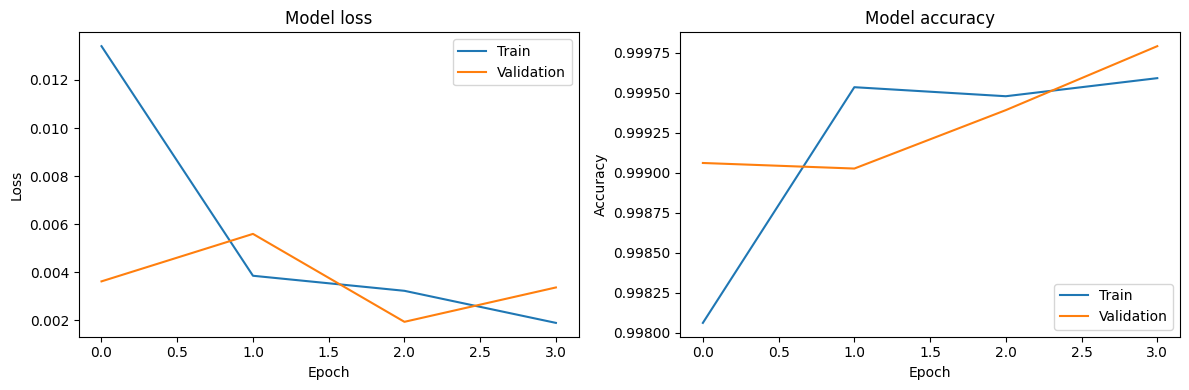

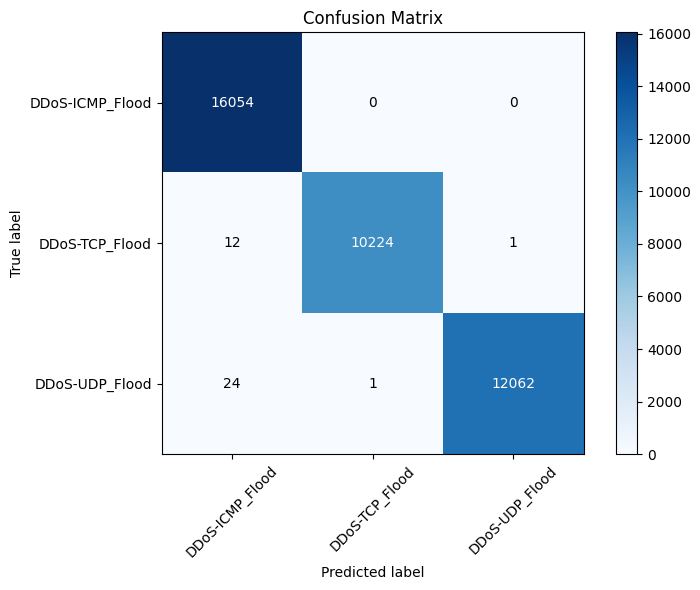

In [ ]:
# Function to plot loss curves
def plot_loss(history1, history2=None):
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss values for the first model
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values for the first model
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    if history2 is not None:
        # Plot training & validation loss values for the second model
        plt.subplot(1, 2, 1)
        plt.plot(history2.history['loss'], linestyle='dashed')
        plt.plot(history2.history['val_loss'], linestyle='dashed')
        plt.legend(['Train', 'Validation', 'Train Privacy', 'Validation Privacy'], loc='upper right')

        # Plot training & validation accuracy values for the second model
        plt.subplot(1, 2, 2)
        plt.plot(history2.history['accuracy'], linestyle='dashed')
        plt.plot(history2.history['val_accuracy'], linestyle='dashed')
        plt.legend(['Train', 'Validation', 'Train Privacy', 'Validation Privacy'], loc='lower right')

    plt.tight_layout()
    plt.show()

# Plot loss curves
plot_loss(model_history)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_classes_mlp)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = conf_matrix.shape[0]

# Get class labels from the LabelEncoder
class_labels = label_encoder.classes_

plt.xticks(np.arange(num_classes), class_labels, rotation=45)
plt.yticks(np.arange(num_classes), class_labels)

thresh = conf_matrix.max() / 2.

# Add text annotations
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Precision-Recall Curve (Not possible for Multiclass Classification, it is designed for Binary Class only)
# precision, recall, thresholds = precision_recall_curve(y_test_binary_true, y_test_pred_mlp)
# area_under_curve = auc(recall, precision)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.show()

## PATE Model Privacy

In [ ]:
# Define your teacher model architecture
def create_teacher_model(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model

# Define differential privacy parameters
batch_size = 16
l2_norm_clip = 1.0
noise_multiplier = 1.3
num_microbatches = 1

# Create a DP optimizer
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=0.003
)

# Define your student model architecture with differential privacy
def create_student_model_privacy(input_shape, num_classes):
    model = Sequential([
        Dense(288, activation="relu", input_shape=input_shape),
        Dropout(0.2),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(288, activation="relu"),
        Dense(64, activation="relu"),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax"),
        Dense(num_classes, activation="softmax")  # Add an additional layer for differential privacy
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Define hyperparameters
num_teachers = 1
input_shape = (len(categorical_columns),)
epsilon = 1.0
kfolds = 4
epoch_num = 4

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)  # Set random_state for reproducibility
cv_results = []

for train_index, test_index in kfold.split(X_train_scaled[categorical_columns], y_train):
    X_train_fold, X_val_fold = X_train_scaled[categorical_columns].iloc[train_index], X_train_scaled[categorical_columns].iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and train teacher models for this fold
    teacher_models = []
    for i in range(num_teachers):
        teacher_model = create_teacher_model(input_shape, num_classes)
        teacher_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
        teacher_model.fit(X_train_fold, y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
        teacher_models.append(teacher_model)

    # Generate labels for the training data using teacher models
    def generate_labels(data):
        labels = []
        for model in teacher_models:
            labels.append(np.argmax(model.predict(data), axis = 1))
        return labels

    # Define your student model
    student_model_privacy = create_student_model_privacy(input_shape, num_classes)
    student_model_privacy.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

    # Generate labels for the training data using teacher models
    train_labels = generate_labels(X_train_fold)
    student_y_train_fold = pd.Series(train_labels[0], index = y_train_fold.index)

    # Train the student model using the labels generated by the teacher models
    student_model_privacy.fit(X_train_fold, student_y_train_fold, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed

    # Evaluate the student model on the validation set
    val_loss, val_accuracy = student_model.evaluate(X_val_fold, y_val_fold)
    cv_results.append((val_loss, val_accuracy))

# Fit the full model on the entire training set
teacher_models = []
for i in range(num_teachers):
    teacher_model = create_teacher_model(input_shape, num_classes)
    teacher_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    teacher_model.fit(X_train_scaled[categorical_columns], y_train, epochs=epoch_num, batch_size=32)  # Adjust epochs and batch_size as needed
    teacher_models.append(teacher_model)

# Generate labels for the training data using teacher models
def generate_labels(data):
    labels = []
    for model in teacher_models:
        labels.append(np.argmax(model.predict(data), axis = 1))
    return labels

# Define your student model
student_model_privacy = create_student_model_privacy(input_shape, num_classes)
student_model_privacy.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Generate labels for the training data using teacher models
train_labels = generate_labels(X_train_scaled[categorical_columns])
student_train_labels = pd.Series(train_labels[0], index = X_train_scaled.index)

# Train the student model using the labels generated by the teacher models
model_history_privacy =  student_model_privacy.fit(X_train_scaled[categorical_columns], student_train_labels, epochs=epoch_num, batch_size=32, validation_split = 0.2)  # Adjust epochs and batch_size as needed

# Evaluate the student model on the test set
test_loss, test_accuracy = student_model_privacy.evaluate(X_test_scaled[categorical_columns], y_test)


Epoch 1/4
6747/6747 [==============================] - 27s 4ms/step - loss: 0.0135 - accuracy: 0.9975
Epoch 2/4
6747/6747 [==============================] - 26s 4ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 3/4
6747/6747 [==============================] - 26s 4ms/step - loss: 0.0036 - accuracy: 0.9989
Epoch 4/4
6747/6747 [==============================] - 10s 2ms/step
Epoch 1/4
6747/6747 [==============================] - 29s 4ms/step - loss: 0.5545 - accuracy: 0.6789
Epoch 2/4
6747/6747 [==============================] - 27s 4ms/step - loss: 0.5224 - accuracy: 0.6814
Epoch 3/4
6747/6747 [==============================] - 27s 4ms/step - loss: 0.9632 - accuracy: 0.4976
Epoch 4/4
2249/2249 [==============================] - 4s 2ms/step - loss: 0.7362 - accuracy: 0.9987
Epoch 1/4
6747/6747 [==============================] - 27s 4ms/step - loss: 0.0113 - accuracy: 0.9975
Epoch 2/4
6747/6747 [==============================] - 25s 4ms/step - loss: 0.0098 - accuracy: 0.9985
Epoch 3/4
6747/

In [ ]:
# Predict on the test data
y_test_pred_mlp_privacy = student_model_privacy.predict(X_test_scaled[categorical_columns])

# # Apply the threshold to make binary predictions
y_test_pred_binary_mlp_privacy = y_test_pred_mlp_privacy.argmax(axis=1)

1200/1200 [==============================] - 2s 2ms/step


In [ ]:
# Print the average cross-validation results
print("Average cross-validation loss:", sum(cv_result[0] for cv_result in cv_results) / len(cv_results))
print("Average cross-validation accuracy:", sum(cv_result[1] for cv_result in cv_results) / len(cv_results))

# Evaluate the MLP model
accuracy_mlp_privacy = accuracy_score(y_test, y_test_pred_binary_mlp_privacy)
precision_mlp_privacy = precision_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')
recall_mlp_privacy = recall_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')
f1_mlp_privacy = f1_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')

# Print the results for the MLP model
print("MLP Model:")
print(f"Accuracy =  {accuracy_mlp_privacy}")
print(f"Precision = {precision_mlp_privacy}")
print(f"Recall = {recall_mlp_privacy}")
print(f"F1 Score =  {f1_mlp_privacy}")

Average cross-validation loss: 0.5802674889564514
Average cross-validation accuracy: 0.9987874925136566
MLP Model:
Accuracy =  0.73096565740789
Precision = 0.5361716912439501
Recall = 0.664246631464262
F1 Score =  0.5843368295494588


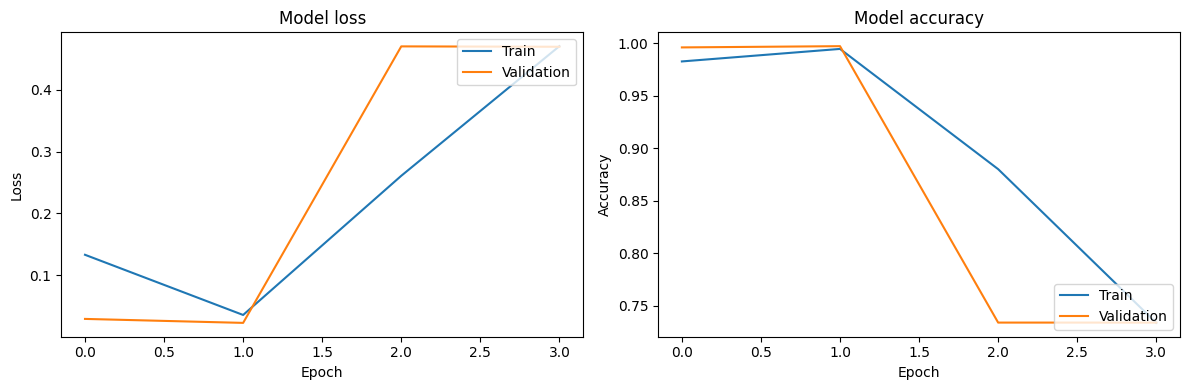

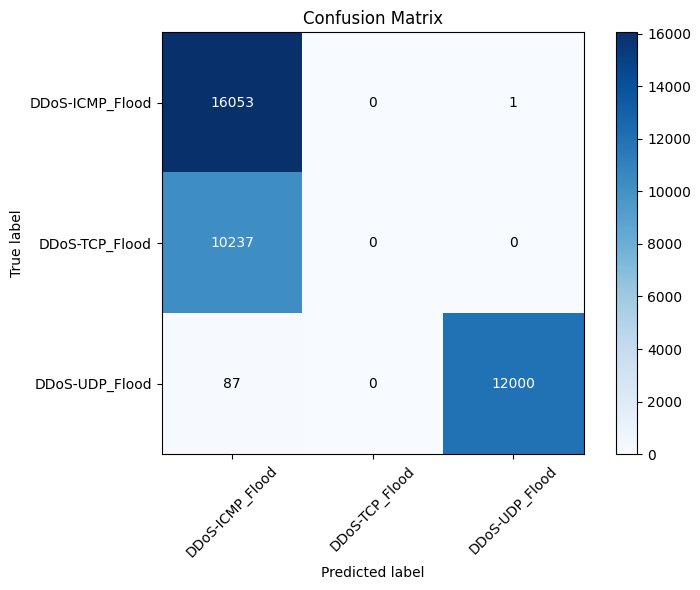

In [ ]:
# Plot loss curves
plot_loss(model_history_privacy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary_mlp_privacy)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = conf_matrix.shape[0]

# Get class labels from the LabelEncoder
class_labels = label_encoder.classes_

plt.xticks(np.arange(num_classes), class_labels, rotation=45)
plt.yticks(np.arange(num_classes), class_labels)

thresh = conf_matrix.max() / 2.

# Add text annotations
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
# precision, recall, thresholds = precision_recall_curve(y_test_binary_true, y_test_pred_binary_mlp_privacy)
# area_under_curve = auc(recall, precision)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label=f'Privacy Model Precision-Recall Curve (AUC = {area_under_curve:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Privacy Model Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.show()

In [ ]:
# Extract trainable variables from the model
trainable_variables = student_model_privacy.trainable_variables

#correct function
privacy_report = compute_dp_sgd_privacy.compute_dp_sgd_privacy_lib.compute_dp_sgd_privacy_statement(
    number_of_examples=len(X_train_scaled),
    batch_size=batch_size,
    noise_multiplier=noise_multiplier,
    num_epochs=30,
    delta=1e-5
)

# Compute privacy budget
#privacy_report = compute_dp_sgd_privacy.compute_dp_sgd_privacy_statement(
   # number_of_examples=len(X_train_scaled),
   # batch_size=batch_size,
   # noise_multiplier=noise_multiplier,
   # num_epochs=3,
   # delta=1e-5
#)

In [ ]:
print(privacy_report)

DP-SGD performed over 287834 examples with 16 examples per iteration, noise
multiplier 1.3 for 30 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:        74.229
    Epsilon assuming Poisson sampling (*):                      1.381

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed that the actual epsilon
should be closer to this value than the conservative assumption of an arbitrary
data order.



## Combine Results

In [ ]:
# Create DataFrame
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Regular': [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp],
    'Privacy': [accuracy_mlp_privacy, precision_mlp_privacy, recall_mlp_privacy, f1_mlp_privacy]
}

df = pd.DataFrame(data)

# Print DataFrame
display(df)

,Metric,Regular,Privacy
0,Accuracy,0.999010,0.730966
1,Precision,0.999194,0.536172
2,Recall,0.998887,0.664247
3,F1 Score,0.999040,0.584337


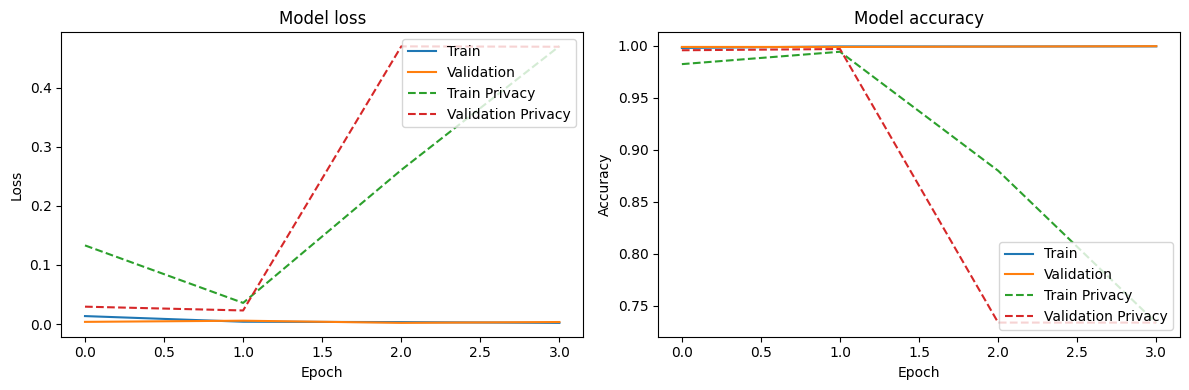

In [ ]:
plot_loss(model_history, model_history_privacy)